# ノック21：データを読み込んで把握
### ファイルの種類
* use_log.csv : ジムの利用履歴データ。期間＝2018/4～2019/3
* customer_master.csv : 会員データ。2019年3月末時点
* class_master.csv     : 会員区分データ(オールタイム、デイタイムなど)
* campaign_master.csv  : キャンペーン区分データ(入会費無料とか)

In [94]:
import pandas as pd

uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [95]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [96]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [97]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


# ノック22：顧客データを成型する
顧客データを主にして、会員区分データとキャンペーン区分データを結合する。<br>


In [98]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000


In [99]:
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


### 結合前・後での顧客数に変化がないことを、len()を使って検証する

In [100]:
print(len(customer))
print(len(customer_join))

4192
4192


### 欠損値有無の検証
joinの際にキーが見つからない/上手くjoinできない場合に欠損値が自動で入れられる。<br>
ここでisnull()を使って欠損値の有無を確認する

In [101]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

欠損値確認の結果から、end_dateのみに欠損値が見られ、<br>
class, name, price, campaign_idなどには影響がなかったことが分かる。<br>
つまり、joinは成功したと言える。

# ノック23：顧客データの基礎集計をする
集計する項目を検討する。例えば、<br>
* どの会員区分、キャンペーン区分が多いか？
* いつ入会・退会が多いのか？
* 男女比率は？
* 退会するまでの期間は？
<br>
ここでは、会員区分、キャンペーン区分、性別、退会済みかの集計していく。

In [102]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [103]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [104]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

女性は1983名、男性は2209名であることが分かる。

In [105]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

退会している人は1350名いることが分かる。<br>
つぎに入会人数を集計する

In [106]:
print(customer_join.dtypes)

customer_id      object
name             object
class            object
gender           object
start_date       object
end_date         object
campaign_id      object
is_deleted        int64
class_name       object
price             int64
campaign_name    object
dtype: object


In [107]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [108]:
print(customer_join["start_date"].dtypes)

datetime64[ns]


In [109]:
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


2018年4月1日以降の顧客数は1361名だったことが分かる。<br>
# ノック24：最新顧客データの基礎集計
最新月の顧客データを集計することで現状の顧客状況を把握することができる。<br>
ここでは最新月で在籍していたユーザデータ"customer_newer"を作って集計する

In [110]:
print(customer_join["end_date"].dtypes)
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
print(customer_join["end_date"].dtypes)

object
datetime64[ns]


In [111]:
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

出力されたデータ件数は2953名だった。<br>
また、end_dateのユニーク値は"NaT"と2019-03-31であることが分かる。<br>
NaTはdatetime型の欠損値なので、これに該当するユーザは退会していないことが分かる。<br>
<br>
## もともとのデータと、最新月データの差分を比較してみる
### ～クラス区分

In [112]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [113]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

## ～キャンペーン区分

In [114]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [115]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

## ～性別

In [116]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [117]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

# ノック25：利用履歴データを集計する
顧客ごとの月利用回数を集計したデータを作成

In [118]:
print(uselog["usedate"].dtypes)
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
print(uselog["usedate"].dtypes)

object
datetime64[ns]


In [119]:
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)

グループラベル("年月"、"customer_id")をインデックスラベルとして使いたくない場合は"as_index=False"とする

In [120]:
uselog_months.head(3)

,年月,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3


In [121]:
del uselog_months["usedate"]

In [122]:
uselog_months.head(3)

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3


### 顧客毎の月内利用回数の集計

In [123]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer.head(3)

,mean,median,max,min
customer_id,,,,
AS002855,4.5,5.0,7,2
AS008805,4.0,4.0,8,1
AS009013,2.0,2.0,2,2


In [124]:
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


# ノック26：利用履歴データから定期利用フラグを作成
ジムの場合、習慣化が継続利用の重要なファクター。<br>
ここでは定期的に利用するユーザを特定してみる。
まず、"usedate"から各データの曜日を算出して、列として追加する。

In [125]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog.head()

,log_id,customer_id,usedate,年月,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


毎月、曜日ごとに通っている回数を求める、「顧客―年月―曜日」の組み合わせでLogidをカウントすることで算出できる。


In [126]:
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index= False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.head()

,customer_id,年月,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [127]:
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


顧客"AS002855"は4月の金曜日(5)に通った回数は4回だということが分かる。<br>

datetimeから曜日を取得、weekdayと曜日の対応<br>
    0: 月, 1: 火, 2: 水, 3: 木, 4: 金, 5: 土, 6: 日<br>
### 顧客毎の各月の最大値を取得し、最大値が4以上の場合にフラグを付けてみる


In [128]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flag"] = 0
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,5,0
4,AS015233,5,0


In [129]:
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


# ノック27：顧客データと利用履歴データを結合
ノック25と26で作成したデータuselog_customer, uselog_weekday, customer_joinを結合する

In [130]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flag"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [131]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flag        0
dtype: int64

結合後に欠損値がないか確認。
# ノック28：会員期間を計算
会員期間はStart_dateとEnd_dateの差分になる。<br>
2019年3月までに退会していないユーザは欠損値が入ってるため、2019年4月30日として会員期間を算出。<br>
2019年3月31日で算出すると、実際に退会する人と重複するため未来の日付として2019年4月30日とした。


In [133]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30


下の<br>
1行目："membership_period"のカラムを追加。<br>
2行目以降、```relativedelta```を使って、退会日から入会日を差し引き登録期間を算出、これをdeltaとする。<br>
    次に、登録期間を月計算して、```membership_period```に代入する。

In [141]:
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta= relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

C:\Users\tfx746\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


ilocで列番号の指定が可能<br>
```relativedelta```で日付を月単位で加算減算できる<br>
relativedelta(datetime_new, datetime_past)

In [142]:
relativedelta(customer_join["calc_date"].iloc[2], customer_join["start_date"].iloc[2])

relativedelta(years=+3, months=+11, days=+29)

# ノック29：顧客行動の各種統計量を把握
基本の統計量を```describe```を使って算出する

In [144]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


列内のmeanは顧客の月内平均利用回数<br>
行内のmeanは顧客の月内平均利用回数の平均<br>
### 次にroutine_flagを集計


In [145]:
customer_join.groupby("routine_flag").count()["customer_id"]

routine_flag
0     779
1    3413
Name: customer_id, dtype: int64

1は同月の同じ曜日を全部出席していた顧客になる。<br>
このデータから定期的にきちんと利用しているユーザは3413名いることが分かる<br>
### 最後に会員数の分布をみる

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

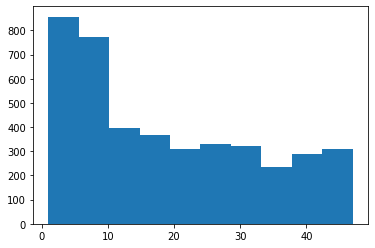

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

この結果から、会員期間が10か月以内のユーザ数が非常に多い事が分かる。<br>
これは大半のユーザが10か月を境に退会する可能性が高い傾向であることが分かる。<br>
# ノック30：退会ユーザと継続ユーザの違いを把握
ここでは退会ユーザの特徴を探っていく。<br>
退会ユーザと、継続ユーザをdescribeで比較する

In [150]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [151]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


routine_flagの平均値を見ると、継続ユーザは0.98と多くのユーザが定期的に利用していることが分かる。<br>
逆に退会ユーザは0.46と定期利用するユーザは半数以下であった。<br>
このことから退会ユーザは定期利用できない傾向が分かる。
## 最後にcustomer_joinのデータをCSV化して出力する

In [152]:
customer_join.to_csv("customer_join.csv", index=False)